In [56]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt



In [57]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
Edge.head()

,edge,edge_weight
0,"('J. Cole', 'Drake')",2.0
1,"('Meek Mill', 'Drake')",0.0
2,"('DJ Khaled', 'Drake')",0.0
3,"('Rick Ross', 'Drake')",10.0
4,"('Wale', 'Drake')",0.0


In [58]:
#extract the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()
#print(Node_color)
Edges = Edge['edge'].tolist()

# Make edges tuples
new_edges = []
for x in Edges:
    x = x[1:-1]
    x = x.split(", ")
    z = []
    for y in x:
        y = y[1:-1]
        z.append(y)
    z = tuple(z)
    new_edges.append(z)
    
Edges = new_edges
fix = []
Edge_weights = Edge['edge_weight'].tolist()
for i in range(0,len(Edges)):
    if(len(Edges[i]) != 2):
        fix.append(i)
        
for x in fix:
    Edges[x] = tuple(["Tyler, The Creator",Edges[x][2]])
    


<class 'float'>
443


In [59]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
    Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
    for index, rows in dat2.iterrows():
        if rows.artist == key:
            Art[key][rows.song_name] = rows.song_info


#add node and weight
for i in range(len(Nodes)):
    G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])

#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
    if Edge_weights[i] == 0:
        Edge_weights[i] = 2
    elif Edge_weights[i] == 1:
        Edge_weights[i] = 3
    elif Edge_weights[i] == 2:
        Edge_weights[i] = 4
    elif Edge_weights[i] == 3:
        Edge_weights[i] = 5
    elif Edge_weights[i] > 3:
        Edge_weights[i] = 7



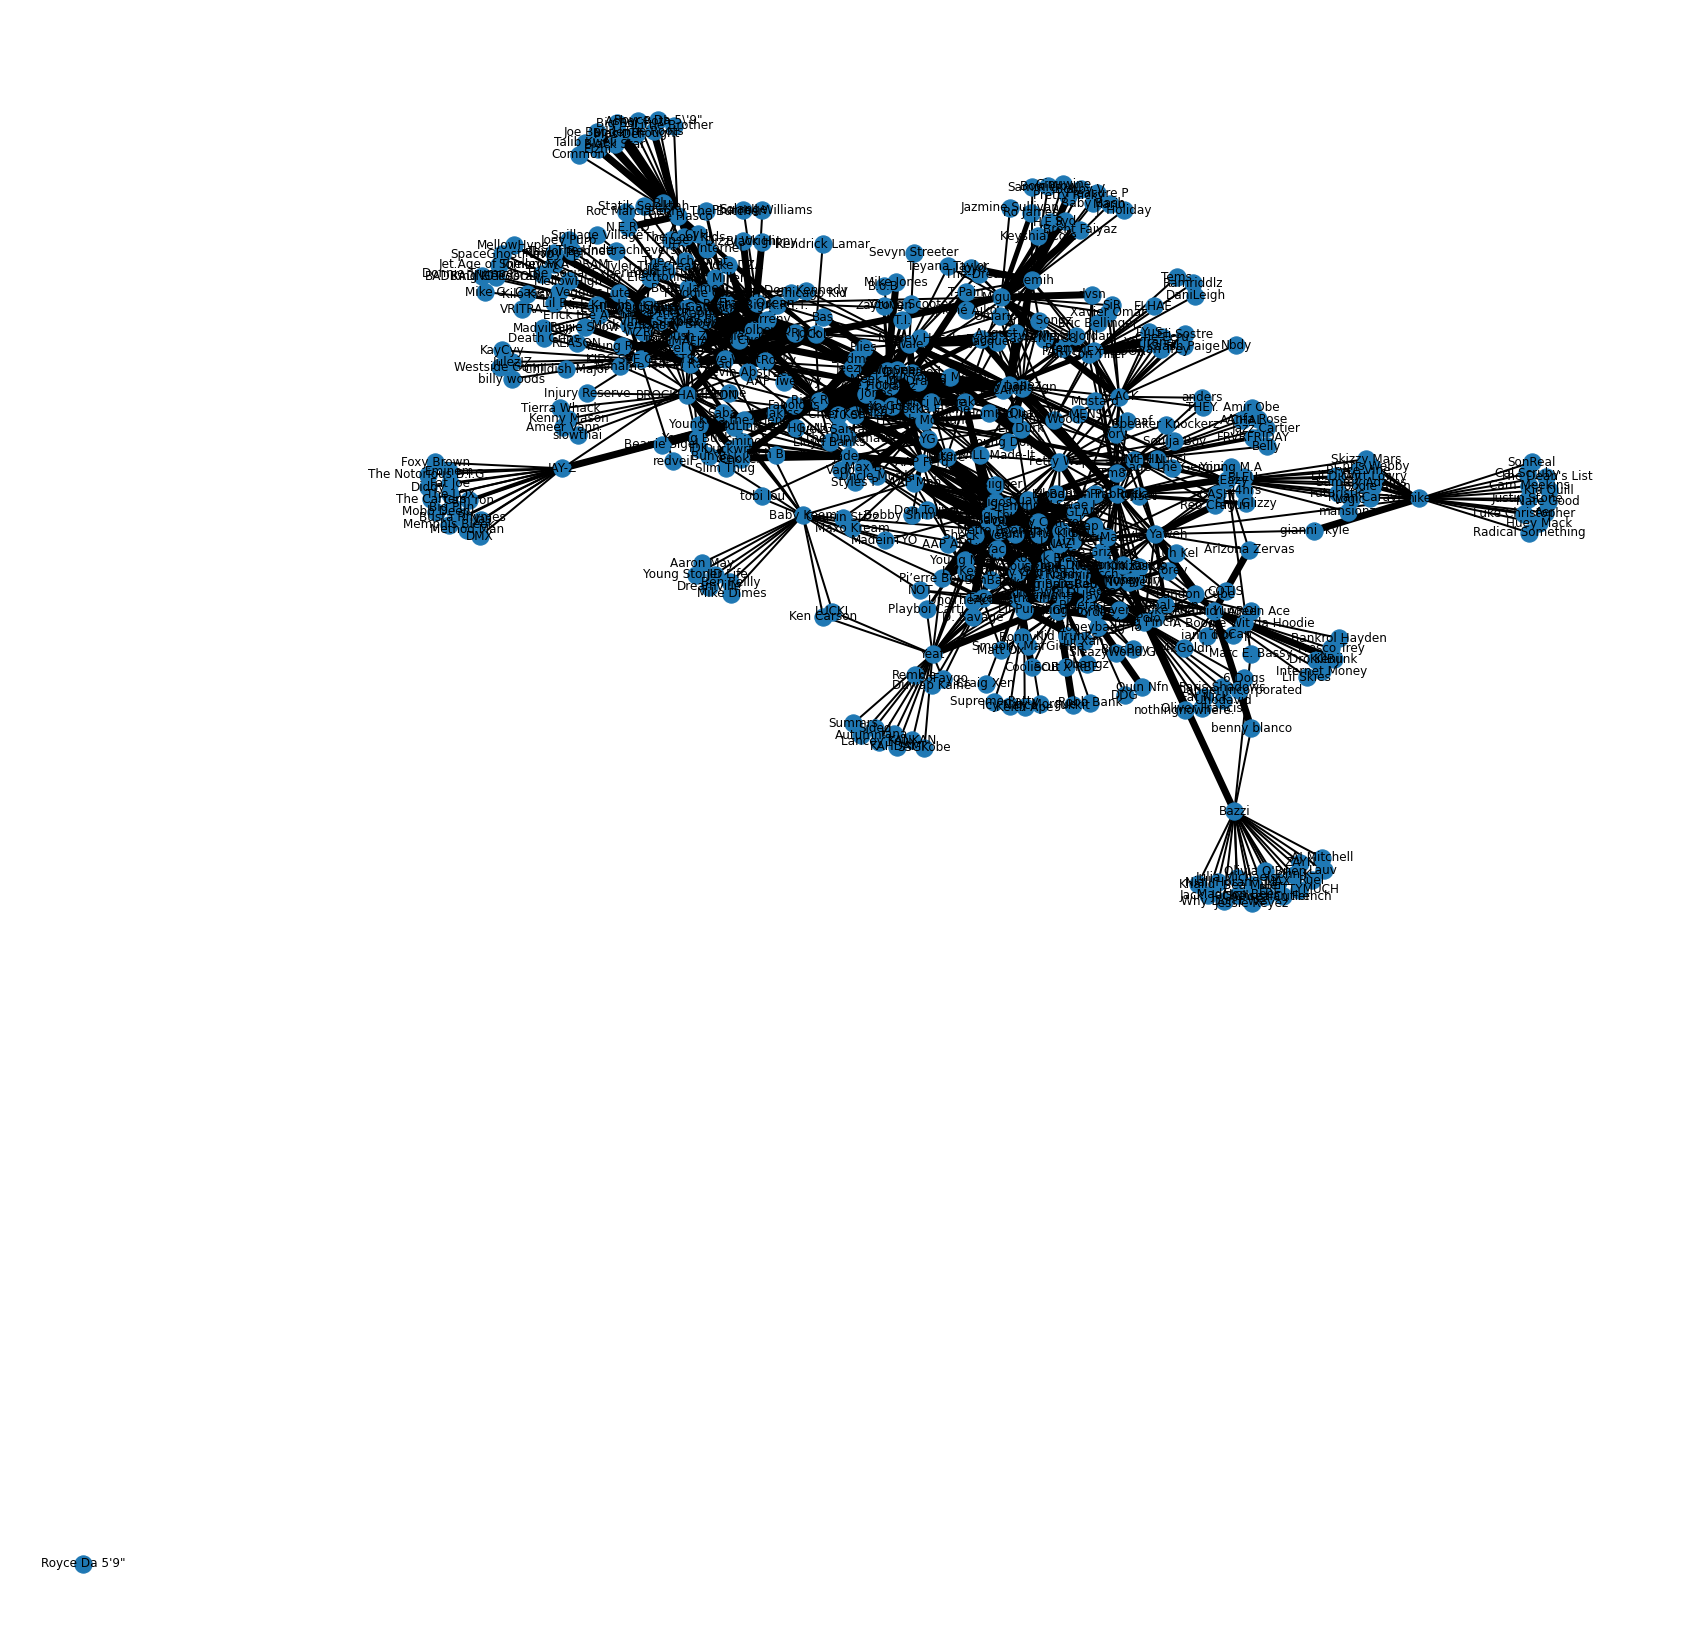

In [60]:
fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G, 
        with_labels=True, 
        #node_size = Node_size, 
        #node_color = Node_color, 
        width = Edge_weights
       )

# Network Analysis

Average Degree:  6.243792325056433
GENERAL
	number of nodes: 443
	number of edges: 1383
	is_directed: False
	is_weighted: False
	number_connected_components 1
	number of triangle:  443
	density: 0.014126226979765686
	average_clustering coefficient:  0.31140704321400153
	degree_assortativity_coefficient:  -0.37605424965054113
	is_tree: False
	diameter: 7
	radius: 4
	average_shortest_path_length:  3.9400426953208787
DEGREE (NORMALIZED)
	min: 0.0022624434389140274
	mean: 0.014126226979765689
	median: 0.004524886877828055
	max: 0.07918552036199096
	top nodes: ['PnB Rock', 'Lil Yachty', 'Quavo', 'NAV', 'Rick Ross', 'Freddie Gibbs']
	           [0.07918552036199096, 0.07692307692307693, 0.07466063348416291, 0.07466063348416291, 0.07239819004524888, 0.07239819004524888]
CLOSENESS CENTRALITY
	min: 0.20898345153664302
	mean: 0.2585582334132601
	median: 0.25070901871809415
	max: 0.36378600823045265
	top nodes: ['AAP Ferg', 'Quavo', '2 Chainz', 'Drake', 'Post Malone', 'Young Thug']
	           [0

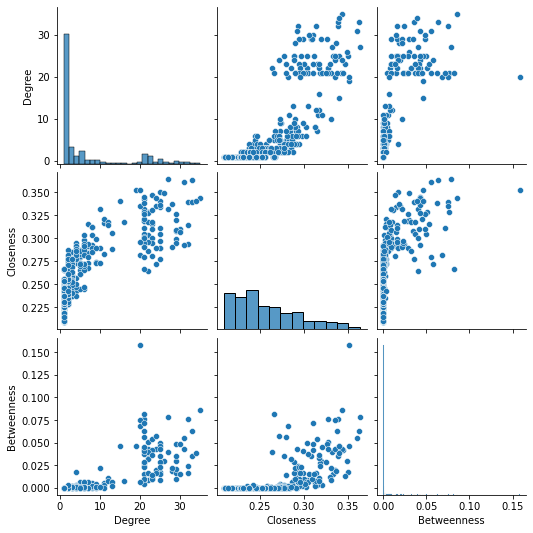

In [61]:
import nx_tools as nxt
import shutil
import random
from importlib import reload  # Python 3.4+
import os
import seaborn as sns
import math

# Isolate GCC
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

def build_output_folder(out_dir_path):
    if(os.path.exists(out_dir_path)):
        shutil.rmtree(out_dir_path)
    os.mkdir(out_dir_path)

output_folder="outputs"
build_output_folder(output_folder)


output_root = "network_analysis_cent_corr"
nxt.ave_degree(G0)
nxt.network_summary(G0)
nxt.plot_centrality_correlation(G0,path=output_folder+"/"+output_root+".pdf")

# Community Detection

In [62]:
# Create Partitions
import itertools
partition_sequence = nx.community.girvan_newman(G0)
ps = []
ps_save = []
k = round(G0.number_of_nodes()-1)
for i in range(0,k):
    x = [sorted(c) for c in next(partition_sequence)]
    ps_save.append(x)
    ps.append(tuple(x))

modularity_sequence = [nx.community.quality.modularity(G0, p) for p in ps]


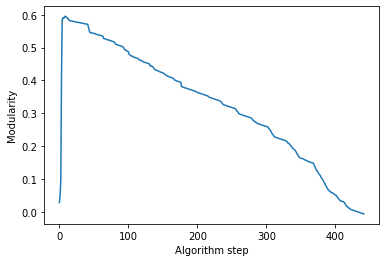

In [63]:
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')
plt.savefig("community_detection_modularity_plot.png")

11


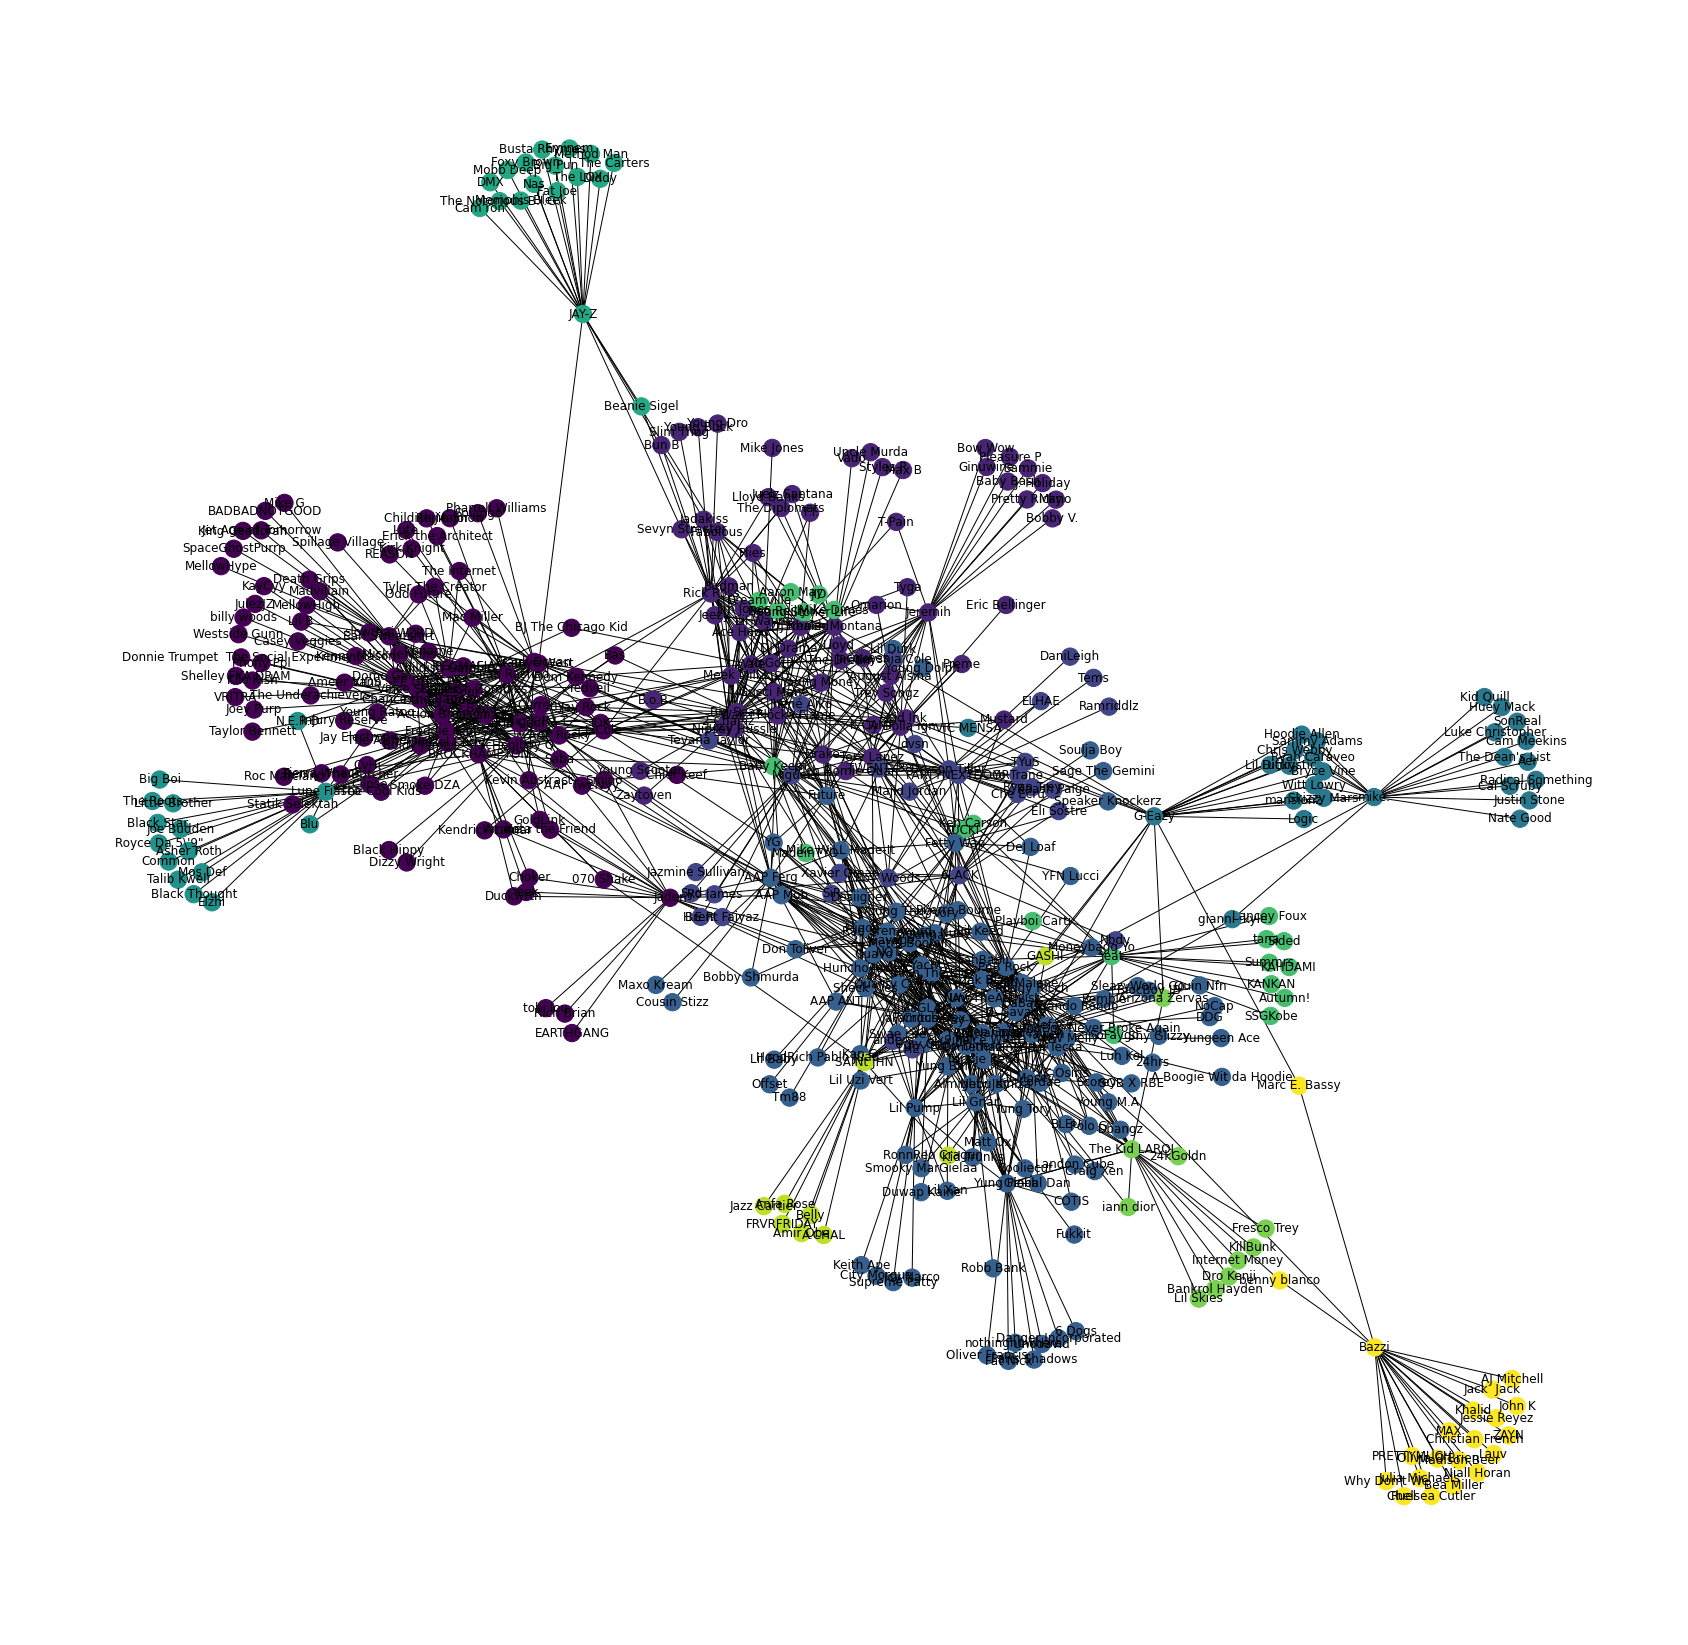

In [64]:
index_max = max(range(len(modularity_sequence)), key=modularity_sequence.__getitem__)

best_partition = ps[index_max]
print(len(best_partition))

def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map
fig, ax = plt.subplots(figsize=(30,30))
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G0.nodes()]
nx.draw(G0, with_labels=True, node_color=node_colors)
plt.savefig("communities.png")

In [68]:
nx.community.quality.modularity(G0, best_partition)
G.nodes['Kanye West']

{'weight': 9000.0,
 'songs': {'True Love': '[85.0, 0.712, 0.861, 5.0, -5.487, 0.0, 0.25, 0.0182, 6.09e-06, 0.511, 0.388, 84.042, 148571.0]',
  'Bound 2': '[84.0, 0.367, 0.665, 1.0, -2.821, 1.0, 0.0465, 0.145, 0.0, 0.113, 0.31, 148.913, 229147.0]',
  'Ni**as In Paris': '[84.0, 0.789, 0.858, 1.0, -5.542, 1.0, 0.311, 0.127, 0.0, 0.349, 0.775, 140.022, 219333.0]',
  'Heartless': '[83.0, 0.79, 0.647, 10.0, -5.983, 0.0, 0.136, 0.0515, 0.0, 0.248, 0.654, 87.999, 211000.0]',
  'Hot Shit (feat. Ye & Lil Durk)': '[83.0, 0.878, 0.685, 9.0, -5.28, 1.0, 0.225, 0.00152, 0.0, 0.0753, 0.523, 157.003, 211649.0]',
  'Flashing Lights': '[83.0, 0.639, 0.628, 6.0, -7.578, 0.0, 0.0399, 0.0381, 0.0, 0.386, 0.43, 90.482, 237507.0]',
  'Father Stretch My Hands Pt. 1': '[82.0, 0.724, 0.573, 7.0, -4.113, 1.0, 0.0549, 0.118, 0.0, 0.538, 0.438, 113.088, 135920.0]',
  'Stronger': '[82.0, 0.617, 0.717, 10.0, -7.858, 0.0, 0.153, 0.00564, 0.0, 0.408, 0.49, 103.992, 311867.0]',
  'Praise God': '[81.0, 0.798, 0.545, 1.0

In [66]:
bp = ps_save[index_max]
print(bp)
bp = pd.DataFrame(bp)
bp.to_csv('partitions.csv')

[['070 Shake', 'AAP Rocky', 'AAP Twelvyy', 'Ab-Soul', 'Action Bronson', 'Ameer Vann', 'Aminé', 'BADBADNOTGOOD', 'BJ The Chicago Kid', 'BROCKHAMPTON', 'Bas', 'Benny The Butcher', 'Big K.R.I.T.', 'Black Hippy', 'Boldy James', 'Casey Veggies', 'Chance the Rapper', 'Chief Keef', 'Childish Gambino', 'Childish Major', 'Choker', 'Clipse', 'Curreny', 'CyHi', 'Danny Brown', 'Death Grips', 'Denzel Curry', 'Dizzy Wright', 'Dom Kennedy', 'Domo Genesis', 'Donnie Trumpet  The Social Experiment', 'Duckwrth', 'EARTHGANG', 'Earl Sweatshirt', 'Erick the Architect', 'Flatbush Zombies', 'Frank Ocean', 'Freddie Gibbs', 'GoldLink', 'IDK', 'Injury Reserve', 'Isaiah Rashad', 'J. Cole', 'JPEGMAFIA', 'Jaden', 'Jay Electronica', 'Jay Rock', 'Jet Age of Tomorrow', 'Joey Bada', 'Joey Purp', 'JulezJZ', 'KIDS SEE GHOSTS', 'Kanye West', 'KayCyy', 'Kendrick Lamar', 'Kenny Mason', 'Kevin Abstract', 'Kid Cudi', 'Kilo Kish', 'King Geedorah', 'Kirk Knight', 'Kota the Friend', 'Lil B', 'Lute', 'Mac Miller', 'Madvillain', '